In [1]:
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from pandas import read_csv

In [2]:
filename="Metabolic Syndrome.csv"

In [4]:
dataframe=read_csv(filename)

In [5]:
dataframe.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [6]:
dataframe.shape

(2401, 15)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [8]:
dataframe[dataframe.duplicated()].shape

(0, 15)

Missing values

In [9]:
import seaborn as sns

<Axes: >

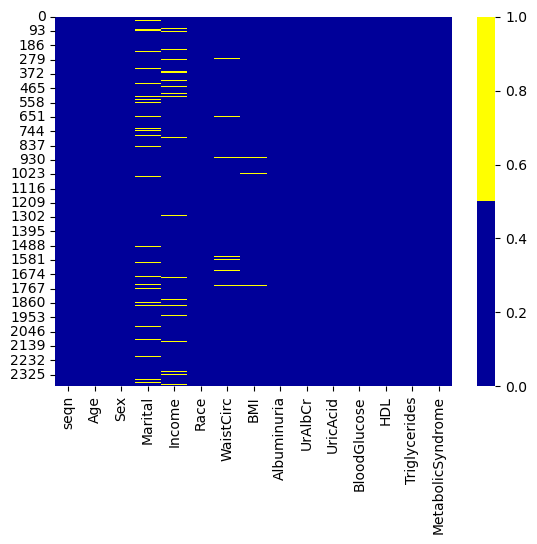

In [10]:
cols=dataframe.columns
colors=["#000099","#ffff00"]
sns.heatmap(dataframe.isnull(),cmap=sns.color_palette(colors))

In [11]:
dataframe[dataframe.isnull().any(axis=1)].head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,0
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,0
10,62199,57,Male,NaN,9000.0,White,107.8,28.0,0,4.16,6.0,100,35,98,1
24,62239,22,Female,NaN,300.0,Hispanic,78.9,23.3,0,5.33,4.1,90,42,68,0


In [12]:
dataframe.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [13]:
dataframe.drop(["Marital","Sex","Race"],axis=1,inplace=True)

In [14]:
dataframe.head()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,8200.0,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,4500.0,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,800.0,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,2000.0,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,NaN,81.1,20.1,0,8.13,5.0,95,43,126,0


In [15]:
dataframe.isnull().sum()

seqn                   0
Age                    0
Income               117
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [16]:
mean_inc=dataframe["Income"].mean()
print(mean_inc)

4005.2539404553413


In [18]:
dataframe["Income"]=dataframe["Income"].fillna(mean_inc)

In [19]:
mean_wc=dataframe["WaistCirc"].mean()
print(mean_wc)

98.30725388601036


In [21]:
dataframe["WaistCirc"]=dataframe["WaistCirc"].fillna(mean_wc)

In [23]:
mean_bmi=dataframe["BMI"].mean()
dataframe["BMI"]=dataframe["BMI"].fillna(mean_bmi)

In [24]:
dataframe.isnull().sum()

seqn                 0
Age                  0
Income               0
WaistCirc            0
BMI                  0
Albuminuria          0
UrAlbCr              0
UricAcid             0
BloodGlucose         0
HDL                  0
Triglycerides        0
MetabolicSyndrome    0
dtype: int64

In [25]:
dataframe.shape

(2401, 12)

In [27]:
dataframe.head()

,seqn,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,8200.00000,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,4500.00000,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,800.00000,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,2000.00000,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,4005.25394,81.1,20.1,0,8.13,5.0,95,43,126,0


Dividing the dataset into x and y

In [26]:
array=dataframe.values

In [28]:
x=array[:,0:11]
y=array[:,11]

In [29]:
kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100

Build the model

In [30]:
model=BaggingClassifier(estimator=cart,n_estimators=num_trees)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8708800138312587


In [31]:
results

array([0.8879668 , 0.88333333, 0.87083333, 0.9       , 0.85833333,
       0.85416667, 0.83333333, 0.9       , 0.85833333, 0.8625    ])

Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [37]:
x=dataframe.iloc[:,0:11]
y=dataframe.iloc[:,8]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [40]:
print(x.shape)

(2401, 11)


In [41]:
print(y_train.shape)

(1680,)


In [43]:
sel=SelectFromModel(RandomForestClassifier(n_estimators=100,max_features=3))
sel.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_features=3))

In [44]:
sel.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False, False])

In [45]:
selected_feat=x_train.columns[(sel.get_support())]

In [46]:
len(selected_feat)

1

In [47]:
print(selected_feat)

Index(['BloodGlucose'], dtype='object')
